# Example 5: Exploring the similarity between classes

Here, we provide an example in which we construct three classes of graphs. We then compare each class pairwise to identify which classes are similar to each other. 


In [13]:
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Parameters for constructing synthetic data

In [2]:

#defining limits on number of nodes
n_min = 20
n_max = 50

#number of graphs
num_g = 50

# number of node features - in this example I will generate random node features that aren't useful for classifcation
n_nf = 3

# empty list of graphs and labels
graphs = []
labels = []
node_features = []

# setting limits on probability of edge existing for random graphs
p_min = 0.1
p_max = 0.5

# setting limits on number of edges to add per node
m_min = 3
m_max = 6

## Create data for class 0

In [3]:

# adding 50 random graphs (label 0)
for i in range(num_g):
    rand_n = np.random.randint(n_min,n_max)
    rand_p = np.random.randint(int(p_min*100),int(p_max*100))/100   
    
    g = nx.fast_gnp_random_graph(rand_n,rand_p)    
    node_feat_matrix = np.random.random((rand_n,n_nf))
    
    graphs.append(g)
    node_features.append(node_feat_matrix)
    
    labels.append(0)

## Create data for class 1

In [4]:
# adding 50  powerlaw cluster graphs (label 1)
for i in range(num_g):
    rand_n = np.random.randint(n_min,n_max)
    rand_p = np.random.randint(int(p_min*100),int(p_max*100))/100   
    rand_m = np.random.randint(m_min,m_max)
    
    g = nx.powerlaw_cluster_graph(rand_n, rand_m, rand_p)
    node_feat_matrix = np.random.random((rand_n,n_nf))
    
    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(1)

## Create data for class 2

In [5]:
# adding 50 watts strogatz graphs (label 2)
for i in range(num_g):
    rand_n = np.random.randint(n_min,n_max)
    rand_p = np.random.randint(int(p_min*100),int(p_max*100))/100   
    rand_m = np.random.randint(m_min,m_max)
    
    g =  nx.watts_strogatz_graph(rand_n, rand_m, rand_p)
    node_feat_matrix = np.random.random((rand_n,n_nf))
    
    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(2)

# Load graphs into graph object

We now have three lists of length 100. The graphs list is composed of numpy arrays that represent the adjacency matrix of the graph. The node features list is composed of numpy arrays that contain the node information for each graph. The labels list is a list of integers that corresponds to the class label for each graph.

The next step is to take this data and convert it into an appropriate format for hcga.

In [7]:
# converting this data into the format required for hcga

from hcga.graph import Graph, GraphCollection

# create graph collection object
g_c = GraphCollection()

# add graphs, node features and labels to the object
g_c.add_graph_list(graphs,node_features,labels)

In [8]:
# perform some sanity checks

print('There are {} graphs'.format(len(g_c.graphs)))
print('There are {} features per node'.format(g_c.get_n_node_features()))


There are 150 graphs
There are 3 features per node


In [9]:
# we can save this if we want to and run everything from the command line
from hcga.io import save_dataset

save_dataset(g_c, 'custom_dataset_multilabel_similarity', folder='./datasets/custom_multilabel_similarity')


# Extracting features


In [2]:
#import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [10]:
# load previously saved dataset
h.load_data('./datasets/custom_multilabel_similarity/custom_dataset_multilabel_similarity.pkl')

In [11]:
# extracting all features here
h.extract(mode='fast', n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features('./results/custom_multilabel_similarity/all_features.pkl')


INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   20.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   54.8s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.

# Analysis

In [3]:
# load the saved features

h.load_features('./results/custom_multilabel_similarity/all_features.pkl')

In [13]:
# implement a classification analyse of the features

h.analyse_features(feature_file='./results/custom_multilabel_similarity/all_features.pkl',results_folder='./results/custom_multilabel_similarity')


INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:hcga.analysis:... Using Xgboost classifier ...
INFO:hcga.analysis:1096 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:1027 valid features
INFO:hcga.analysis:1027 with interpretability 1
INFO:hcga.analysis:Counts of graphs/label: 
0.0    50
2.0    50
1.0    50
Name: label, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 0.933 ---
INFO:hcga.analysis:Fold accuracy: --- 0.933 ---
INFO:hcga.analysis:Fold accuracy: --- 0.933 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analy

# Pairwise classification

In [4]:
accuracy_matrix, top_features = h.pairwise_classification(feature_file='./results/custom_multilabel_similarity/all_features.pkl')

INFO:hcga.analysis:1096 total features
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:1027 valid features
INFO:hcga.analysis:1027 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
  0%|          | 0/3 [00:00<?, ?it/s]INFO:hcga.analysis:Counts of graphs/label: 
0.0    50
1.0    50
Name: label, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 0.8 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.

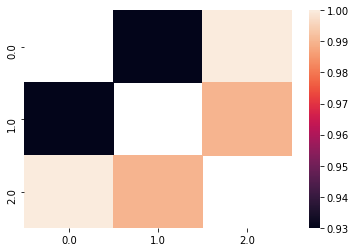

In [14]:
sns.heatmap(accuracy_matrix)
plt.show()

In [15]:
# what are the top features for classifying between class 0 and class 1?
print(top_features[(0.0, 1.0)])

['CB_closeness centrality_std', 'CB_katz centrality_max', 'CoN_core number_std', 'AS_degree assortativity_std_N', 'AS_degree assortativity_sum_E']
